## Fuel consumption ratings
Data sets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

To help you compare vehicles from different model years, the fuel consumption ratings for 1995 to 2014 vehicles have been adjusted to reflect 5-cycle testing. Note that these are approximate values that were generated from the original ratings, not from vehicle testing.

In [2]:
!pip install numpy==2.2.2
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.1
!pip install matplotlib==3.10.1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

## Load the Data

In [4]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [5]:
df = pd.read_csv(url)

In [6]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
227,2014,CHEVROLET,EXPRESS 3500 PASSENGER,VAN - PASSENGER,6.0,8,A6,X,22.1,15.0,18.9,15,435
725,2014,MERCEDES-BENZ,C 300 4MATIC FFV,COMPACT,3.5,6,AS7,E,16.4,11.1,14.0,20,224
415,2014,FORD,FUSION HYBRID,MID-SIZE,2.0,4,AV,X,5.3,5.7,5.5,51,126
599,2014,JEEP,WRANGLER UNLIMITED 4X4 (4-DOOR),SUV - SMALL,3.6,6,M6,X,15.0,11.4,13.4,21,308
951,2014,SUBARU,IMPREZA WAGON AWD,STATION WAGON - SMALL,2.0,4,AV,X,8.7,6.6,7.8,36,179


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
cdf = df[["ENGINESIZE","CYLINDERS",'FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
439,5.3,8,16.5,380
726,3.5,6,10.5,242
924,6.7,12,17.1,393
850,2.0,4,9.3,214
953,2.5,4,11.2,258
45,4.2,8,17.7,407
287,3.6,6,14.8,237
875,3.4,6,10.1,232
561,5.0,8,13.3,306


## Visualize features

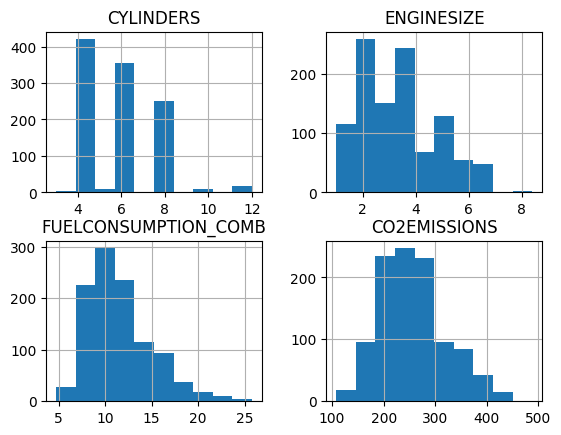

In [12]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()

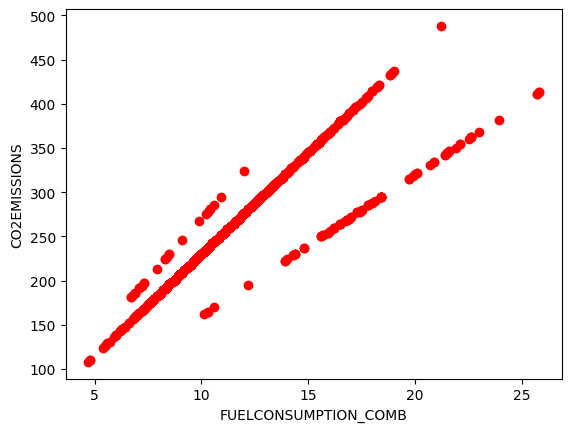

In [14]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="red")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

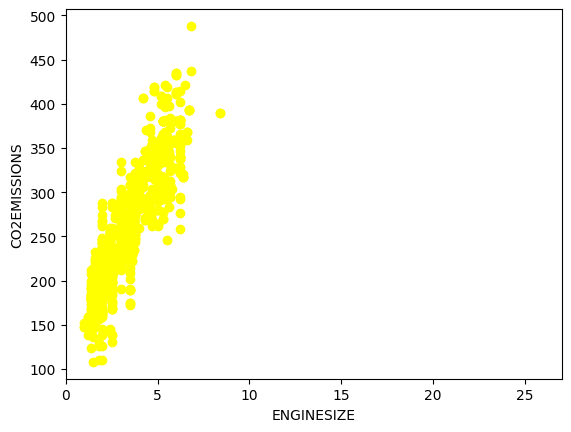

In [15]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="yellow")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.xlim(0,27)
plt.show()

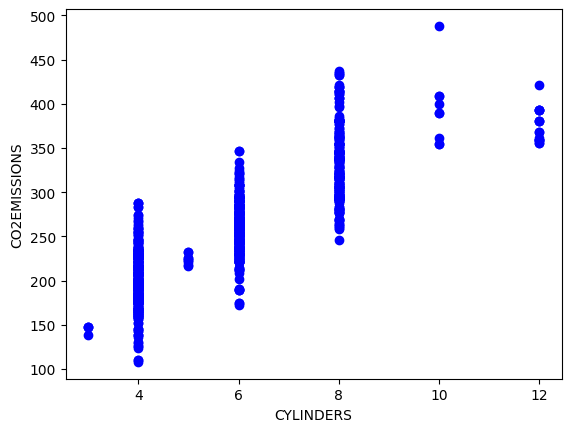

In [16]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

## Extract the input feature and labels from the dataset

In [17]:
x = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()


create train and test datasets

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)


In [19]:
type(x_train), np.shape(x_train), 

(numpy.ndarray, (853,))

## build simple linear regression model

In [22]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()
regressor.fit(x_train.reshape(-1,1), y_train)

print('coefficients: ', regressor.coef_[0])
print('intercept: ',regressor.intercept_)

coefficients:  38.992978724434074
intercept:  126.28970217408721


## Visualize model output

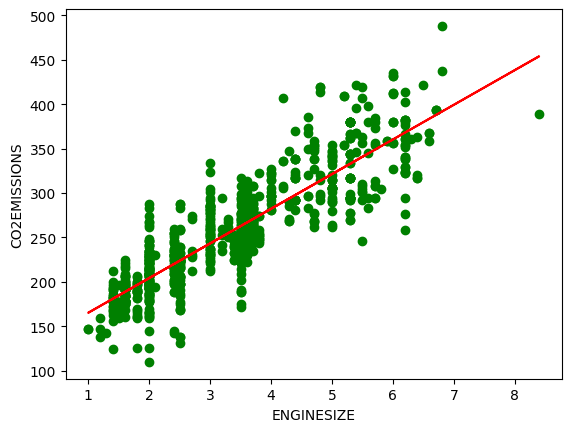

In [23]:
plt.scatter(x_train, y_train, color="green")
plt.plot(x_train, regressor.coef_*x_train+ regressor.intercept_, '-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

y_test_ = regressor.predict( x_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test_, y_test))
print("R2-score: %.2f" % r2_score( y_test_, y_test) )

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.68


In [29]:
y_test_ = regressor.predict(x_test.reshape(-1,1))